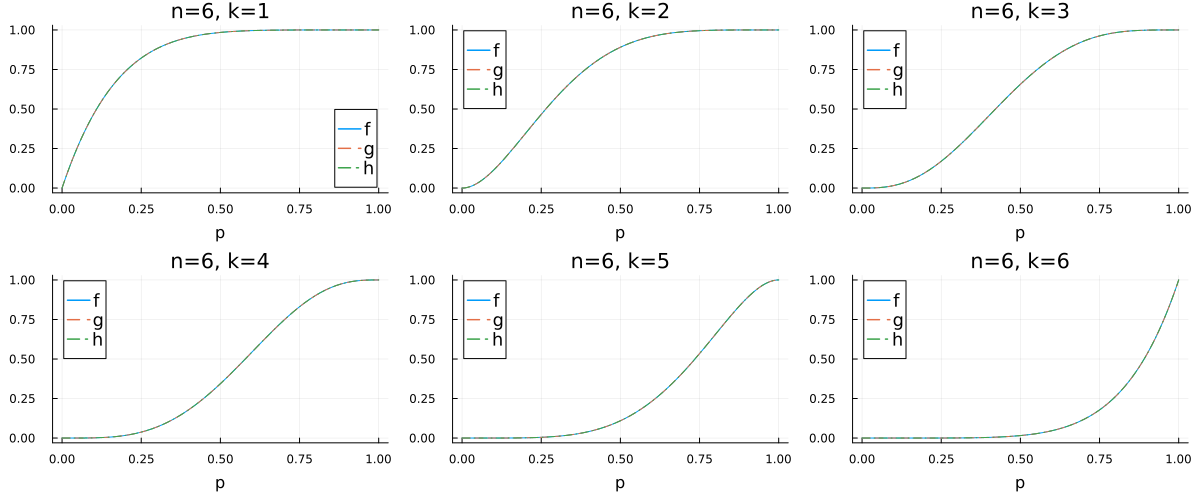

In [1]:
using Distributions, Plots; default(fmt=:png, legendfontsize=12)

f(n, k, p) = ccdf(Binomial(n, p), k-1)
g(n, k, p) = cdf(NegativeBinomial(k, p), n-k)
h(n, k, p) = cdf(Beta(k, n-k+1), p)

n = 6; PP = []
for k in 1:6
    P = plot(title="n=$n, k=$k", xguide="p", bottommargin=6Plots.mm)
    for (fun, ls) in zip((f, g, h), (:solid, :dash, :dashdot))
        plot!(p -> fun(n, k, p), eps(), 1; label="$fun", ls)
    end
    push!(PP, P)
end
plot(PP...; size=(1200, 500))

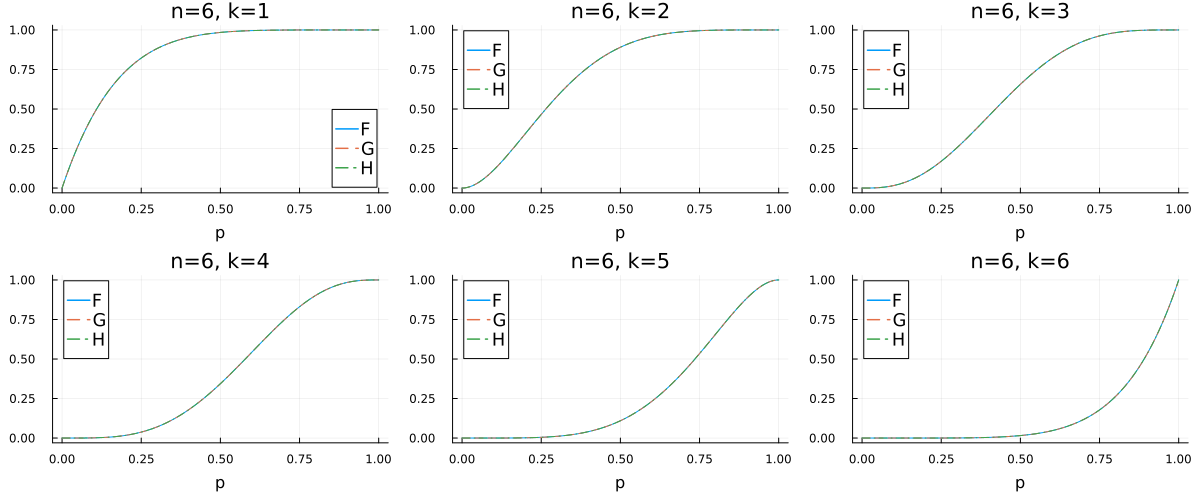

In [2]:
F(n, k, p) = sum(binomial(n, i) * p^i * (1-p)^(n-i) for i in k:n)
G(n, k, p) = sum(binomial(j-1, k-1) * p^k * (1-p)^(j-k) for j in 1:n)
H(n, k, p) = cdf(Beta(k, n-k+1), p)

n = 6; PP = []
for k in 1:6
    P = plot(title="n=$n, k=$k", xguide="p", bottommargin=6Plots.mm)
    for (fun, ls) in zip((F, G, H), (:solid, :dash, :dashdot))
        plot!(p -> fun(n, k, p), eps(), 1; label="$fun", ls)
    end
    push!(PP, P)
end
plot(PP...; size=(1200, 500))